In [3]:
## Dementia Risk Analysis - Group Project
# --------------------------------------
# This explores how lifestyle factors such as alcohol consumption, physical activity,
# Smoking and diet affect the risk of developing dementia


In [2]:
# Dependencies (this needs to be adjusted as needed)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as stats
import seaborn as sns

In [3]:
# Load the dataset
# Replace this with the path to your dataset
data_path = "dementia.csv"


# Display t the dataset to get a preview

# Paige

In [4]:
# first part: Data Overview - Paige
# Provide a summary of the dataset by checking for null values, basic statistics,data types, and add a visualization or table
#Read CSV
dementia_df = pd.read_csv(data_path)
dementia_df

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,Donepezil,10.0,88,...,Never Smoked,Positive,Mild Activity,No,5,No,Balanced Diet,Poor,Diabetes,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,NaN,NaN,80,...,Never Smoked,Negative,Moderate Activity,No,9,Yes,Low-Carb Diet,Poor,Diabetes,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,NaN,NaN,67,...,Never Smoked,Positive,Sedentary,No,8,Yes,Balanced Diet,Good,Diabetes,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,Memantine,20.0,62,...,Never Smoked,Positive,Sedentary,Yes,2,No,Low-Carb Diet,Good,NaN,1


In [5]:
#Printing the Basic Statistical Summary
print("\nBasic Statistical Summary:")
stats_summary = dementia_df.describe()
print(stats_summary)


Basic Statistical Summary:
          Diabetic  AlcoholLevel    HeartRate  BloodOxygenLevel  \
count  1000.000000   1000.000000  1000.000000       1000.000000   
mean      0.513000      0.098429    79.383000         95.226051   
std       0.500081      0.058715    12.107556          2.929262   
min       0.000000      0.000414    60.000000         90.010677   
25%       0.000000      0.045505    68.000000         92.875017   
50%       1.000000      0.098235    79.000000         95.390420   
75%       1.000000      0.151840    90.000000         97.785111   
max       1.000000      0.199866   100.000000         99.999230   

       BodyTemperature       Weight    MRI_Delay  Dosage in mg          Age  \
count      1000.000000  1000.000000  1000.000000    485.000000  1000.000000   
mean         36.761513    74.321326    30.103568      9.213402    74.908000   
std           0.431701    14.463765    16.862170      6.493188     9.095068   
min          36.002108    50.069731     0.094684    

In [6]:
print("\nData Types:")
data_types = dementia_df.dtypes
print(data_types)


Data Types:
Diabetic                       int64
AlcoholLevel                 float64
HeartRate                      int64
BloodOxygenLevel             float64
BodyTemperature              float64
Weight                       float64
MRI_Delay                    float64
Prescription                  object
Dosage in mg                 float64
Age                            int64
Education_Level               object
Dominant_Hand                 object
Gender                        object
Family_History                object
Smoking_Status                object
APOE_ε4                       object
Physical_Activity             object
Depression_Status             object
Cognitive_Test_Scores          int64
Medication_History            object
Nutrition_Diet                object
Sleep_Quality                 object
Chronic_Health_Conditions     object
Dementia                       int64
dtype: object


In [7]:
#checking null values, 
null_values = dementia_df.isnull().sum() 
print(null_values)

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions    179
Dementia                       0
dtype: int64


## 4th Part: Nutritional Diet and Dementia Diagnosis - Feda 
## ----------------------------------------------------------
- Is there a significant relationship between the patient's nutritional diet and dementia diagnosis?
- Added multiple visualizations such as a pie chart for dementia diagnosis by diet, bar plots for cognitive scores by diet, or any graph analyze the impact of diet on different age groups.

In [8]:
#Cleaning the data
# Drop Prescription and Dosage in mg and Chronic Health Conditions
dementia_df_cleaned = dementia_df.drop(columns=['Prescription', 'Dosage in mg', 'Chronic_Health_Conditions'])

# check to confirm the changes
dementia_df_cleaned


,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Education_Level,Dominant_Hand,...,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,Primary School,Left,...,No,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,Secondary School,Right,...,No,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,Primary School,Right,...,Yes,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,Secondary School,Left,...,Yes,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,Secondary School,Right,...,Yes,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,88,Diploma/Degree,Left,...,Yes,Never Smoked,Positive,Mild Activity,No,5,No,Balanced Diet,Poor,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,80,Primary School,Left,...,No,Never Smoked,Negative,Moderate Activity,No,9,Yes,Low-Carb Diet,Poor,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,67,Primary School,Right,...,No,Never Smoked,Positive,Sedentary,No,8,Yes,Balanced Diet,Good,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,62,No School,Left,...,Yes,Never Smoked,Positive,Sedentary,Yes,2,No,Low-Carb Diet,Good,1


In [9]:
dementia_df.columns

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'Prescription',
       'Dosage in mg', 'Age', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Cognitive_Test_Scores', 'Medication_History',
       'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions',
       'Dementia'],
      dtype='object')

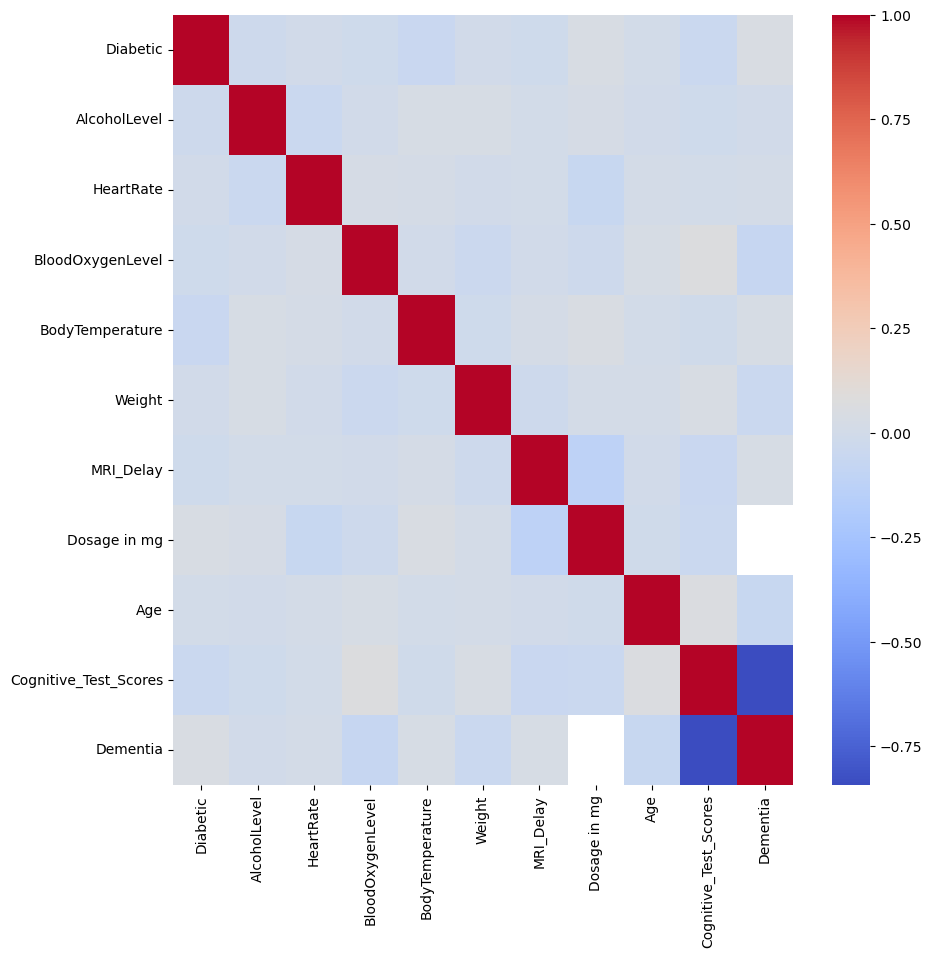

In [10]:
plt.figure(figsize=(10,10))

numeric_df = dementia_df.select_dtypes(["number"])
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.show()

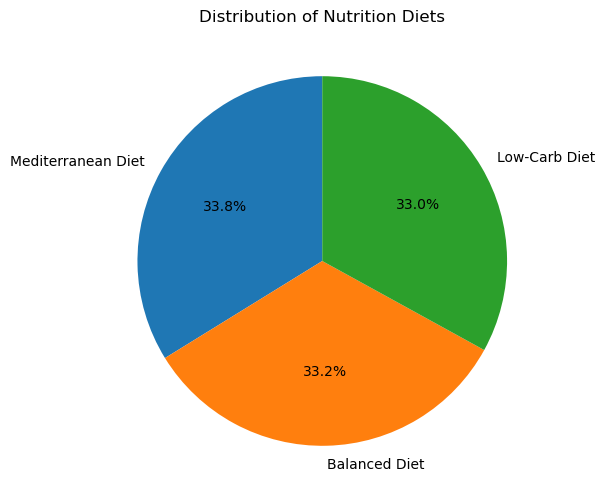

In [11]:
# Generate a pie chart of the Nutrition_Diet showing the distribution of the unique diet

# Count occurrences of each diet type
nutrition_diet = dementia_df["Nutrition_Diet"].value_counts()
    
# Use unique diet types as labels
labels = nutrition_diet.index  # Get diet names as labels
    
# Create a pie chart
plt.figure(figsize=(6,6))  # Optional: make the pie chart larger
nutrition_diet.plot.pie(
    labels=labels,        # Set labels to diet names
    autopct="%1.1f%%",    # Show percentage on the chart
    startangle=90         # Optional: start the pie chart at 90 degrees
)
    
plt.ylabel("")  # Hide the y-axis label to clean up the plot
plt.title("Distribution of Nutrition Diets")  # Optional: Add a title
plt.show()
# else:
#     print("Column 'Nutrition_Diet' not found in the DataFrame.")

<Axes: xlabel='Family_History'>

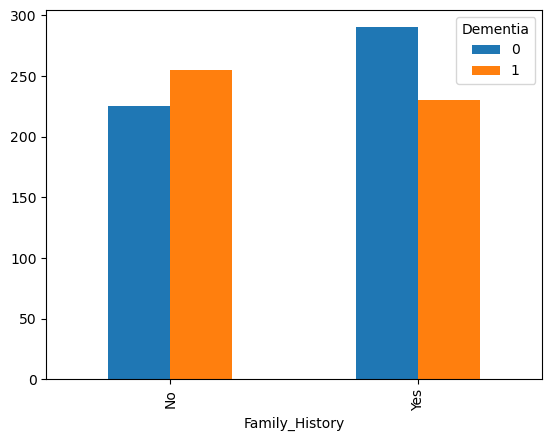

In [12]:
dementia_df.groupby(["Family_History", "Dementia"]).size().unstack().plot.bar()

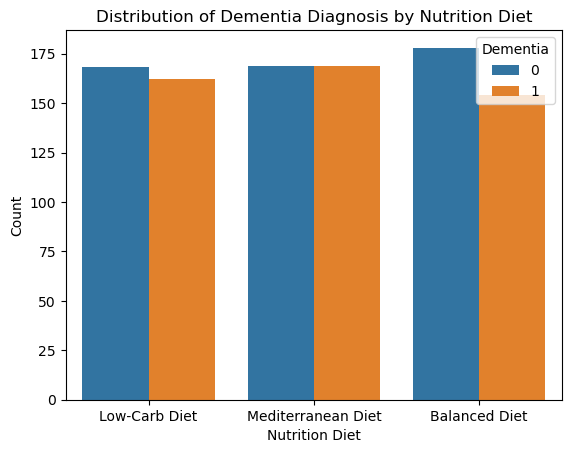

In [13]:
# Create a bar plot of Nutrition_Diet vs Dementia diagnosis
sns.countplot(data=dementia_df, x="Nutrition_Diet", hue="Dementia")

plt.title("Distribution of Dementia Diagnosis by Nutrition Diet")
plt.ylabel("Count")
plt.xlabel("Nutrition Diet")
plt.show()

In [15]:
# Contingency table between Nutrition_Diet and Dementia
contingency_table = pd.crosstab(dementia_df["Nutrition_Diet"], dementia_df["Dementia"])

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant association between Nutrition Diet and Dementia.")
else:
    print("There is no statistically significant association between Nutrition Diet and Dementia.")

Chi-square statistic: 0.944881061082028
P-value: 0.6234787909613961
There is no statistically significant association between Nutrition Diet and Dementia.


In [16]:
# Contingency table between Nutrition_Diet and Dementia
contingency_table = pd.crosstab(dementia_df["Family_History"], dementia_df["Dementia"])

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant association between Family History and Dementia.")
else:
    print("There is no statistically significant association between Family History and Dementia.")

Chi-square statistic: 7.553111903277044
P-value: 0.00599065320507048
There is a statistically significant association between Family History and Dementia.


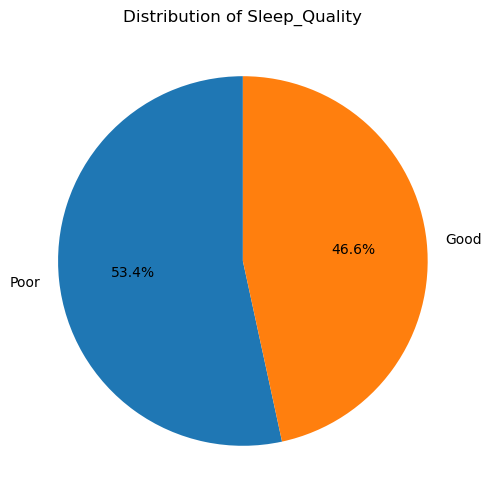

In [17]:
# Count occurrences of each diet type
sleep_quality = dementia_df["Sleep_Quality"].value_counts()
    
# Use unique diet types as labels
labels = sleep_quality.index  # Get diet names as labels
    
# Create a pie chart
plt.figure(figsize=(6,6))  # Optional: make the pie chart larger
sleep_quality.plot.pie(
    labels=labels,        # Set labels to diet names
    autopct="%1.1f%%",    # Show percentage on the chart
    startangle=90         # Optional: start the pie chart at 90 degrees
)
    
plt.ylabel("")  # Hide the y-axis label to clean up the plot
plt.title("Distribution of Sleep_Quality")  # Optional: Add a title
plt.show()
# else:
#     print("Column 'Sleep_Quality' not found in the DataFrame.")

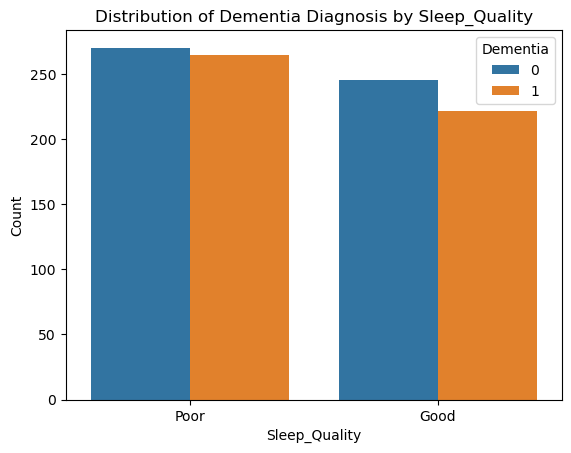

In [18]:
# Create a bar plot of Nutrition_Diet vs Dementia diagnosis
sns.countplot(data=dementia_df, x="Sleep_Quality", hue="Dementia")

plt.title("Distribution of Dementia Diagnosis by Sleep_Quality")
plt.ylabel("Count")
plt.xlabel("Sleep_Quality")
plt.show()

In [19]:
# Contingency table between Nutrition_Diet and Dementia
contingency_table = pd.crosstab(dementia_df["Sleep_Quality"], dementia_df["Dementia"])

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant association between Sleep_Quality and Dementia.")
else:
    print("There is no statistically significant association between Sleep_Quality and Dementia.")

Chi-square statistic: 0.3272479558329268
P-value: 0.5672841025931478
There is no statistically significant association between Sleep_Quality and Dementia.


# Pat 

In [ ]:
# 2nd Part: Alcohol Consumption and Dementia 
# --------------------------------------------------------------------------------
# Does alcohol consumption level correlate with a higher risk of dementia when
# controlling for other variables like age and smoking status?

In [ ]:
# Example:
# Does alcohol consumption level correlate with a higher risk of dementia when controlling for other variables
# like age and smoking status?

# Lakshay

In [ ]:
# 3rd Part: Physical Activity, Smoking, and Cognitive Scores 
# -----------------------------------------------------------------------------------------------
# How does physical activity and smoking status impact cognitive test scores?

In [ ]:
# Example:
# Group by physical activity and smoking status and calculate mean cognitive scores

In [ ]:
# Example:
# Group by diet and calculate the dementia diagnosis rate

# Nathaly

In [ ]:
# 5th Part: Statistical Analysis
# ---------------------------------------------------------------------
# Task: Conduct statistical tests such as correlation or regression to examine relationships between variables.


In [ ]:
# Example:
# Perform linear regression on alcohol consumption and cognitive scores

In [ ]:
# Conclusion: Insights and Recommendations
